In [ ]:
# 🏥 Medical Insurance Cost Prediction

Objective:  
Estimate the insurance charges a person may incur using personal information such as age, BMI, smoking status, number of children, and region.

Goal:  
Train a Linear Regression model to predict the charges field and understand how age, BMI, and smoker status affect costs.


In [2]:
# STEP 1: Library and Dataset import
import pandas as pd

# Load dataset
df = pd.read_csv("medical_insurance.csv")

# View structure
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
# STEP 2: Data Cleaning and Preparation

from sklearn.preprocessing import LabelEncoder

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables (smoker, sex, region)
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])  # yes=1, no=0
df = pd.get_dummies(df, columns=['region'], drop_first=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


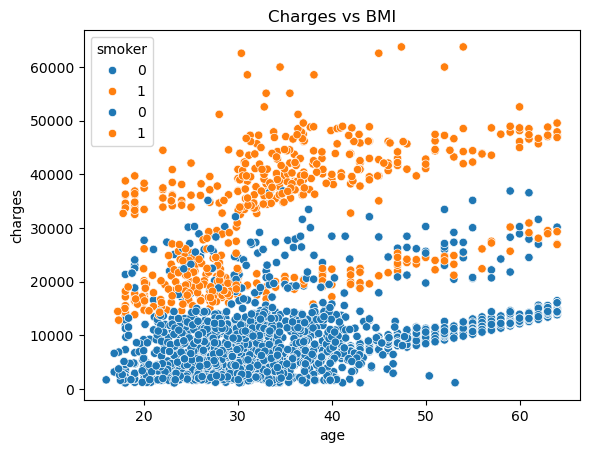

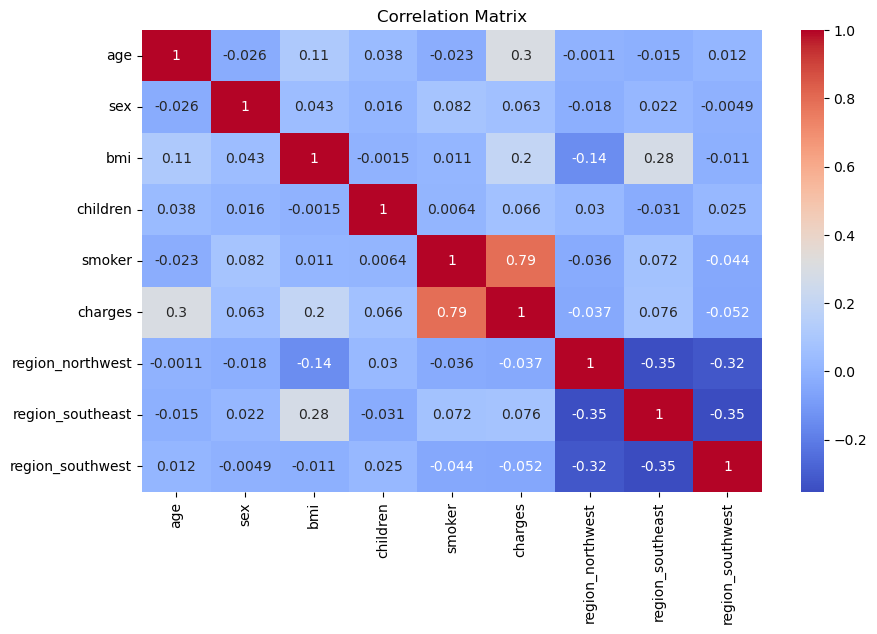

In [ ]:
# STEP 3: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Charges vs Age
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Charges vs Age")

# Charges vs BMI
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("Charges vs BMI")

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
# STEP 4: Model taining and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define X and y
X = df.drop('charges', axis=1)
y = df['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [19]:
# STEP 5: Model Evaluation (MAE, RMSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4160.25
RMSE: 6319.27


In [ ]:
# Conclusion

- Smoker status has the strongest influence on insurance charges.
- Age and BMI also positively correlate with higher costs.
- The Linear Regression model achieved a *MAE of ~4,000–5,000* and *RMSE of ~6,000–7,000*.
- The model could be improved using more advanced algorithms like Random Forest or XGBoost.

In [5]:
# Load and save Task 4 - Medical insurance dataset
insurance_df = pd.read_csv("medical_insurance.csv")
insurance_df.to_csv("task4_insurance_clean.csv", index=False)